## Gradient Descent

### Introduction

This concept may be your first encounter with iterative algorithms. Iteration is interesting; it can yield final results without complex computation. The only thing you need is time. This reminds me of a famous theory in computer science: [Halting Problem](https://en.wikipedia.org/wiki/Halting_problem). By learning the iterative algorithms more deeply, you will find that this concept is not as easy as it seems. You need to ensure your loop stops at some point, rather than running endlessly. We can observe some exceptionally elegant algorithms whose theoretical foundations can prove the maximum number of iterations they will undergo.

### Introduction to Gradient Descent

Consider a system:

$$\textbf{Ax}=\textbf{b}$$

If we want to use the iterative method to solve this system, we can establish an iterative input:

$$\textbf{x}^{(n+1)}=\textbf{x}^{(n)}+\alpha\textbf{d}^{(n)}$$

And we can use $\|\textbf{Ax}^{(n)}-\textbf{b}\|$ to judge the error.

The problem is: how to define $\alpha$ and $\textbf{d}^{(n)}$?


### Quadratic Function and the Jacobian

Let's consider a quadratic function first:

$$f(\textbf{x})=\frac{1}{2}\textbf{x}^T\textbf{Ax}-\textbf{x}^T\textbf{b}$$

We can calculate the Jacobian of this function (recall your calculus courses):

$$\frac{\partial f(\mathbf{x})}{\partial \mathbf{x}} = \mathbf{x}^\top \mathbf{A} - \mathbf{b}^\top$$

The gradient of the function is the transpose of the Jacobian:

$$\nabla f(\mathbf{x}) = \left( \frac{\partial f(\mathbf{x})}{\partial \mathbf{x}} \right)^\top = \mathbf{Ax} - \mathbf{b}$$

*Note that in some cases the gradient is not the transpose of the Jacobian. You should understand these concepts in this way: the gradient describes the directional rate of change of the function at some point, the Jacobian describes a transformation, which can be compared to a matrix (That's why we say "Jacobian Matrix").*

When the gradient equals to $\textbf{0}$, we can say the quadratic function reaches its critical point, and that is what we want to solve.

To see this more mathematically, we can do the Taylor series expansion to the quadratic function:

$$f(\bar{\mathbf{x}} + \delta \mathbf{x}) \approx f(\bar{\mathbf{x}}) + \left[ \left. \frac{\partial f(\mathbf{x})}{\partial \mathbf{x}} \right|_{\mathbf{x}=\bar{\mathbf{x}}} \right] \delta \mathbf{x} + \frac{1}{2} \delta \mathbf{x}^\top \left[ \left. \frac{\partial}{\partial \mathbf{x}} \left( \frac{\partial f(\mathbf{x})}{\partial \mathbf{x}} \right)^\top \right|_{\mathbf{x}=\bar{\mathbf{x}}} \right] \delta \mathbf{x}$$

The first- and second-order derivative terms are called the Jacobian and Hessian of the function. As said before, we want the Jacobian to be zero to reach the critical point. The Hessian then determines whether this crucial point is a maximum or a minimum (for a quadratic system, the Hessian is equal to $\textbf{A}$, then if it is positive definite, the system will always have a minimum point).

### Gradient Descent and Steepest Descent

As mentioned earlier, we want to find $\alpha$ and $\textbf{d}^{(n)}$ for the iteration. The gradient is a good choice, since it points in the direction of the largest ascent, it is also the error vector $\boldsymbol{\epsilon}^{(n)}$ for the linear system. In this case, we want the "descent", so we can add a negative symbol before:

$$\textbf{d}^{(n)}=-\nabla f(\textbf{x}^{(n)})$$

Then, we need to find $\alpha$. To make everything run fast (since time is money, and we are always looking forward to the fastest way), we want to choose the $\alpha$ such that it will give us the maximum descent in the direction $-\nabla f(\textbf{x}^{(n)})$. We can use the differentiation to calculate this "maximum". First of all, let's establish a new function:

$$\phi(\alpha) = f(\mathbf{x}^{(n)} + \alpha \mathbf{d}^{(n)})$$

Expand it and we will have:

$$\phi(\alpha) = f(\mathbf{x}^{(n)}) + \alpha \mathbf{d}^{(n)\top}\nabla f(\textbf{x}^{(n)}) + \frac{1}{2} \alpha^2 \mathbf{d}^{(n)\top} \mathbf{Ad}^{(n)}$$

We want $\frac{d\phi}{d\alpha}=0$, solving for $\alpha$ and we can get:

$$\alpha^{(n)} = -\frac{\mathbf{d}^{(n)\top}\nabla f(\textbf{x}^{(n)})}{\mathbf{d}^{(n)\top}\mathbf{A}\mathbf{d}^{(n)}}$$

The equation above is a generalized equation, which is capable for all $\textbf{d}^{(n)}$. In this case, we have $\textbf{d}^{(n)}=-\nabla f(\textbf{x}^{(n)})$, then the $\alpha$ becomes:

$$\alpha^{(n)}=\frac{\nabla f(\mathbf{x}^{(n)})^\top \nabla f(\mathbf{x}^{(n)})}{\nabla f(\mathbf{x}^{(n)})^\top \mathbf{A} \nabla f(\mathbf{x}^{(n)})}$$

And the iterative algorithm becomes:

$$\begin{aligned}
\mathbf{x}^{(n+1)} &= \mathbf{x}^{(n)} + \alpha^{(n)}\mathbf{d}^{(n)} \\
&= \mathbf{x}^{(n)} - \left( \frac{\nabla f(\mathbf{x}^{(n)})^\top \nabla f(\mathbf{x}^{(n)})}{\nabla f(\mathbf{x}^{(n)})^\top \mathbf{A} \nabla f(\mathbf{x}^{(n)})} \right) \nabla f(\mathbf{x}^{(n)})
\end{aligned}$$

This is called **Steepest Descent**.

Let us do it by $\texttt{python}$ code:

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def steepest_descent(A, b, tot=1e-10, max_iter=100, x_initial=None):
    # Initialization
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float).reshape(-1, 1)
    n = A.shape[0]
    if not(x_initial):
        x_initial = np.ones(n).reshape(-1, 1)
    iteration = 0
    epsilon = 1
    x_now = x_initial
    # Optional: Just want to visualize the iteration path
    iteration_path = np.array(x_now.reshape(1, 2))
    while epsilon >= tot and iteration < max_iter:
        grad = A @ x_now - b
        nume = grad.T @ grad
        denom = grad.T @ A @ grad
        epsilon = np.linalg.norm(grad)
        x_now = x_now - nume / denom * grad
        iteration += 1
        iteration_path = np.vstack((iteration_path, x_now.reshape(1, 2)))
    return x_now, iteration, iteration_path

In [78]:
A = np.array([[3, 2],
              [2, 6]])

b = np.array([[2],
              [-8]])

x, iteration, iteration_path = steepest_descent(A, b)

print("Result:")
print(x)
print(f"Iteration: {iteration}")

Result:
[[ 2.]
 [-2.]]
Iteration: 25


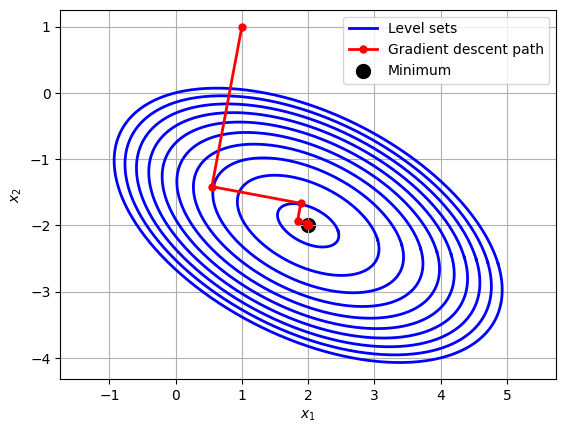

In [84]:
# Compute minimizer (center of ellipses)
x_star = np.linalg.solve(A, b)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(A)
D_inv_sqrt = np.diag(1 / np.sqrt(eigenvalues))
A_inv_sqrt = eigenvectors @ D_inv_sqrt @ eigenvectors.T

# Unit circle
theta = np.linspace(0, 2*np.pi, 400)
x = np.cos(theta)
y = np.sin(theta)
u = np.column_stack((x, y))

# Level values
levels = np.linspace(0.5, 20, 10)

# Plot
plt.figure()

for i, c in enumerate(levels):
    v = np.sqrt(c) * (A_inv_sqrt @ u.T)

    # shift ellipse to the true center
    v[0] += x_star[0, 0]
    v[1] += x_star[1, 0]

    if i == 0:
        plt.plot(v[0], v[1], linewidth=2, color="blue", label="Level sets")
    else:
        plt.plot(v[0], v[1], linewidth=2, color="blue")

# Iteration path
plt.plot(iteration_path[:, 0], iteration_path[:, 1],
         'ro-', linewidth=2, markersize=5,
         label="Gradient descent path")

plt.scatter(x_star[0, 0], x_star[1, 0],
            s=100, color="black", label="Minimum")

plt.axis('equal')
plt.grid(True)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.legend()
plt.show()

### Conjugated Gradient Method

Although Steepest Descent shows good convergence, are there any algorithms that can iterate even faster? The answer is yes! If we consider the descent process geometrically, the path from the initial point to the minimum point can be decomposed into two basis vectors (at least in the 2D case). However, for steepest descent, there are more iterations than this number, meaning that we repeat the direction in which we have already headed. What if we keep finding directions we've never ventured into before? i.e., we see the path orthogonal to our current direction ($\Delta\textbf{x}=\textbf{x}_{now}-\textbf{x}^{(0)}$). This is called the **conjugate gradient method**. And we are going to find the orthogonality in $\textbf{A}$-coordinates, because in the quadratic problem, we are no longer in Euclidean coordinates; we are using Euclidean coordinates for the calculation, and every direction and length are changing if we go into the $\textbf{A}$-coordinates (see [linear algebra notes](../basic_knowledges/linear_algebra.md) for more info).

We can do some mathematical explanation to emphasize its validity: why we can confidently say that this method will exactly get the minimum direction components?

Firstly, recall that:

$$\phi(\alpha) = f(\mathbf{x}^{(n)} + \alpha \mathbf{d}^{(n)})$$

We need the derivative of this, which is:

$$
\begin{align*}
\frac{d\phi(\alpha)}{d\alpha}&=\frac{df(\mathbf{x}^{(n)} + \alpha \mathbf{d}^{(n)})}{d\alpha} \\
&=\frac{\partial f(\mathbf{x}^{(n)} + \alpha \mathbf{d}^{(n)})}{\partial(\mathbf{x}^{(n)} + \alpha \mathbf{d}^{(n)})}\frac{d(\mathbf{x}^{(n)} + \alpha \mathbf{d}^{(n)})}{d\alpha} \\
&=\nabla f(\textbf{x}^+)^T\textbf{d}^{(n)}=0
\end{align*}
$$

Where $\textbf{x}^+=\textbf{x}+\boldsymbol{\alpha}^{(n)}\textbf{d}^{(n)}$ is the current location. We just turn $\frac{d\phi(\alpha)}{d\alpha}$ to a directional derivative!

Let $\textbf{Ax}_{true}=\textbf{b}$, we can have the distance between the current location and the endpoint:

$$\nabla f(\textbf{x}^+)=\textbf{Ax}^+-\textbf{b}=\textbf{Ax}^+-\textbf{Ax}_{true}=\textbf{A}(\textbf{x}^+-\textbf{x}_{true})=\textbf{Ae}$$

Then we will have:

$$
\begin{align*}
(\textbf{Ae})^T\textbf{d}^{(n)}&=0 \\
\textbf{e}^T\textbf{Ad}^{(n)}&=0
\end{align*}
$$

This means that the last best direction is always orthogonal (in \textbf{A}-coordinates) to the path ahead. And this is where the validity comes from.

After covering all this theoretical groundwork, let's turn our attention to algorithms and equations. The strategy is that we want the orthogonality ${\textbf{d}^{(n)}}^T\textbf{A}\textbf{d}^{(n+1)}=0$, and we also want to have the steepest gradient descent. Then we will have:

$$\mathbf{d}^{(n+1)} = -\nabla f(\mathbf{x}^{(n+1)}) + \beta^{(n)}\mathbf{d}^{(n)}$$

The latter term is to substract the direction we have already traveled. Plug in this equation to the othogonality equation and solve for $\beta^{(n)}$, we will obtain:

$$\beta^{(n)} = \frac{\mathbf{d}^{(n)\top}\mathbf{A}\nabla f(\mathbf{x}^{(n+1)})}{\mathbf{d}^{(n)\top}\mathbf{A}\mathbf{d}^{(n)}}$$

We still use the same equation for $\alpha^{(n)}$, and we can try to simplify it. Just start with our mathematical demostration shown before, $(\textbf{Ae})^T\textbf{d}^{(n)}=0$, which can also be written as $(\nabla(x^{(n+1)}))^T\textbf{d}^{(n)}=0$. If we use this relationship, and plug into the numerator of $\alpha$, we will have:

$$\mathbf{d}^{(n)\top}\nabla f(\textbf{x}^{(n)})=(-\nabla f(\mathbf{x}^{(n)}) + \beta^{(n-1)}\mathbf{d}^{(n-1)})^T\nabla f(\textbf{x}^{(n)})$$

Obviously, the latter term becomes zero, and we finally have the simplified form of $\alpha$:

$$\alpha^{(n)} = \frac{\nabla f(\textbf{x}^{(n)})^\top \nabla f(\textbf{x}^{(n)})}{\mathbf{d}^{(n)\top}\mathbf{A}\mathbf{d}^{(n)}}$$

Finally, regarding this algorithm, I wish to express my personal appreciation and interest in it. At the beginning, I mentioned the Halting Problem. For some of the algorithms, we are unable to predict the iteration times. But for this algorithm, in theory, it will halt after at most $n$ iterations for an $n\times n$ matrix. This is impressive for the practical use since it initially gives us a sketch on the time complexity of this algorithm, which is essential for any computational techniques.

### Preconditioned Conjugate Gradient (PCG)

For the gradient descent, we can apply a preconditioner to boost the convergence speed and keep the numerical stability. Since it is an advanced topic, I will not talk too much about it. Here are some common preconditioners we used.

1. Jacobi (Diagonal):

$$\mathbf{M} = \text{diag}(\mathbf{A}), \quad \mathbf{M}^{-1} = \text{diag}(a_{11}^{-1}, \dots, a_{nn}^{-1})$$

2. Matrix splitting:

$$\mathbf{A} = \mathbf{L} + \mathbf{D} + \mathbf{U}$$

3. Symmetric Gauss–Seidel:

$$\mathbf{M}^{-1} = (\mathbf{D} + \mathbf{L})^{-1} \mathbf{D} (\mathbf{D} + \mathbf{U})^{-1}$$

4. Symmetric successive over-relaxation (SOR):

$$\mathbf{M}^{-1} = (\mathbf{D} + \omega\mathbf{L})^{-1} \mathbf{D} (\mathbf{D} + \omega\mathbf{U})^{-1}, \quad \omega \in [0, 2]$$

### Coding

The code below shows the conjugated gradient (CG) algorithm.

Brief sketch of calculation path (without preconditioning):

$$
\nabla f(x^{(n)}) \; \text{and} \; \textbf{d}^{(n)} \to \alpha^{(n)} \to \textbf{x}^{(n+1)} \to \nabla f(x^{(n+1)}) \to \beta^{(n)} \to \textbf{d}^{(n+1)}
$$

PCG Equations and Algorithms:

**Initialization:**
$$\mathbf{r}^{(0)} = \mathbf{b} - \mathbf{Ax}^{(0)}, \quad \mathbf{z}^{(0)} = \tilde{\mathbf{M}}\mathbf{r}^{(0)}, \quad \mathbf{d}^{(0)} = \mathbf{z}^{(0)}$$

**Iteration steps for $k = 0, 1, 2, \dots$:**

1. **Calculate step size:**
$$\alpha^{(k)} = \frac{(\mathbf{r}^{(k)})^\top \mathbf{z}^{(k)}}{(\mathbf{d}^{(k)})^\top \mathbf{A} \mathbf{d}^{(k)}}$$

2. **Update solution estimate:**
$$\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + \alpha^{(k)}\mathbf{d}^{(k)}$$

3. **Update residual:**
$$\mathbf{r}^{(k+1)} = \mathbf{r}^{(k)} - \alpha^{(k)}\mathbf{A}\mathbf{d}^{(k)}$$

4. **Apply preconditioner:**
$$\mathbf{z}^{(k+1)} = \tilde{\mathbf{M}}\mathbf{r}^{(k+1)}$$

5. **Calculate improvement ratio:**
$$\beta^{(k)} = \frac{(\mathbf{r}^{(k+1)})^\top \mathbf{z}^{(k+1)}}{(\mathbf{r}^{(k)})^\top \mathbf{z}^{(k)}}$$

6. **Update search direction:**
$$\mathbf{d}^{(k+1)} = \mathbf{z}^{(k+1)} + \beta^{(k)}\mathbf{d}^{(k)}$$

In [88]:
# I only do conjugated gradient here
def conjugate_gd(A, b, tol=1e-10, max_iter=100, x_initial=None):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float).reshape(-1, 1)
    n = A.shape[0]
    if x_initial is None:
        x_now = np.ones((n, 1))
    else:
        x_now = np.array(x_initial, dtype=float).reshape(-1, 1)
    # Residual (IMPORTANT: b - A x)
    r = b - A @ x_now
    d = r.copy()
    iteration = 0
    epsilon = np.linalg.norm(r)
    iteration_path = [x_now.copy()]
    while epsilon >= tol and iteration < max_iter:
        Ad = A @ d
        alpha = (r.T @ r) / (d.T @ Ad)
        x_now = x_now + alpha * d
        r_next = r - alpha * Ad
        beta = (r_next.T @ r_next) / (r.T @ r)
        d = r_next + beta * d
        r = r_next
        # Loop condition
        epsilon = np.linalg.norm(r)
        iteration += 1
        iteration_path.append(x_now.copy())

    return x_now, iteration, np.array(iteration_path)

In [90]:
x, iteration, iteration_path = conjugate_gd(A, b)
print("Result:")
print(x)
print(f"Iteration time: {iteration}")

Result:
[[ 2.]
 [-2.]]
Iteration time: 2


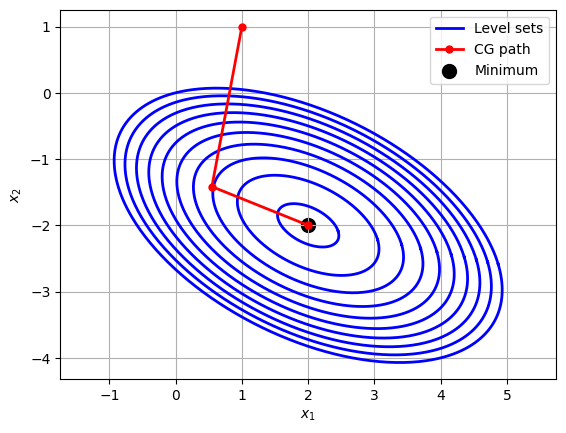

In [92]:
# Compute minimizer (center of ellipses)
x_star = np.linalg.solve(A, b)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(A)
D_inv_sqrt = np.diag(1 / np.sqrt(eigenvalues))
A_inv_sqrt = eigenvectors @ D_inv_sqrt @ eigenvectors.T

# Unit circle
theta = np.linspace(0, 2*np.pi, 400)
x = np.cos(theta)
y = np.sin(theta)
u = np.column_stack((x, y))

# Level values
levels = np.linspace(0.5, 20, 10)

# Plot
plt.figure()

for i, c in enumerate(levels):
    v = np.sqrt(c) * (A_inv_sqrt @ u.T)

    # shift ellipse to the true center
    v[0] += x_star[0, 0]
    v[1] += x_star[1, 0]

    if i == 0:
        plt.plot(v[0], v[1], linewidth=2, color="blue", label="Level sets")
    else:
        plt.plot(v[0], v[1], linewidth=2, color="blue")

# Iteration path
plt.plot(iteration_path[:, 0], iteration_path[:, 1],
         'ro-', linewidth=2, markersize=5,
         label="CG path")

plt.scatter(x_star[0, 0], x_star[1, 0],
            s=100, color="black", label="Minimum")

plt.axis('equal')
plt.grid(True)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.legend()
plt.show()